In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [4]:
data = pd.read_csv("src/data.csv", sep=",")

In [19]:
for i in range(len(data)):
    data.loc[i, "Previous qualification (grade)"] = data.loc[i, "Previous qualification (grade)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Curricular units 1st sem (grade)"] = float(str(data.loc[i, "Curricular units 1st sem (grade)"]).replace("٫", "."))
    data.loc[i, "Curricular units 2nd sem (grade)"] = float(str(data.loc[i, "Curricular units 2nd sem (grade)"].replace("٫", ".")))
    # data.loc[i, "Curricular units 2nd sem (credited)"] = data.loc[i, "Curricular units 2nd sem (credited)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Unemployment rate"] = data.loc[i, "Unemployment rate"].replace("٫", ".")
    data.loc[i, "Inflation rate"] = data.loc[i, "Inflation rate"].replace("٫", ".")
    data.loc[i, "GDP"] = data.loc[i, "GDP"].replace("٫", ".")

In [20]:
column_data = data["Curricular units 1st sem (grade)"]
len_data = len(column_data)
# find outliers for that column (using Interquartile Range)
int_data = []
for item in column_data:
    int_data.append(float(item))

In [21]:
Q1 = np.percentile(int_data, 25, method = 'midpoint')
Q2 = np.percentile(int_data, 50, method = 'midpoint') 
Q3 = np.percentile(int_data, 75, method = 'midpoint')
IQR = Q3 - Q1

low_lim =  Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [22]:
print(low_lim)
print(up_lim)

7.3999999999999995
17.0


In [23]:
data[(data["Curricular units 1st sem (grade)"] > float(up_lim)) | (data["Curricular units 1st sem (grade)"] < float(low_lim))]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,1,5,9070,1,1,122,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
7,1,18,4,9254,1,1,119,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.0,0,0,5,5,0,0.0,0,15.5,2.8,-4.06,Dropout
12,1,1,2,9853,1,1,133,1,19,37,4,9,130.2,1,0,0,1,0,0,19,0,0,6,6,0,0.0,0,0,6,0,0,0.0,0,12.7,3.7,-1.7,Dropout
20,1,1,3,171,1,1,122,1,1,1,9,8,120.3,0,0,0,1,0,1,21,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,11.1,0.6,2.02,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1,1,3,171,1,1,137,1,1,3,5,2,133.9,1,0,0,1,1,0,19,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,12.7,3.7,-1.7,Graduate
4372,1,39,1,9003,1,1,130,1,12,12,9,9,126.1,0,0,0,1,1,0,24,0,0,6,7,0,0.0,0,0,6,10,0,0.0,0,12.4,0.5,1.79,Dropout
4375,1,43,1,9991,0,1,161,1,37,37,9,9,100,1,0,0,1,0,0,27,0,0,5,5,0,0.0,0,0,5,5,0,0.0,0,7.6,2.6,0.32,Dropout
4381,1,1,2,9238,1,1,145,1,1,19,4,8,121.4,0,0,0,1,0,0,20,0,0,6,13,0,0.0,0,0,5,11,0,0.0,0,9.4,-0.8,-3.12,Enrolled


array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>],
       [<Axes: title={'center': 'Previous qualification'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>],
       [<Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Scholarship holder'}>,
        <Axes: title={'center': 'Age at enrollment'}>,
        <Axes: 

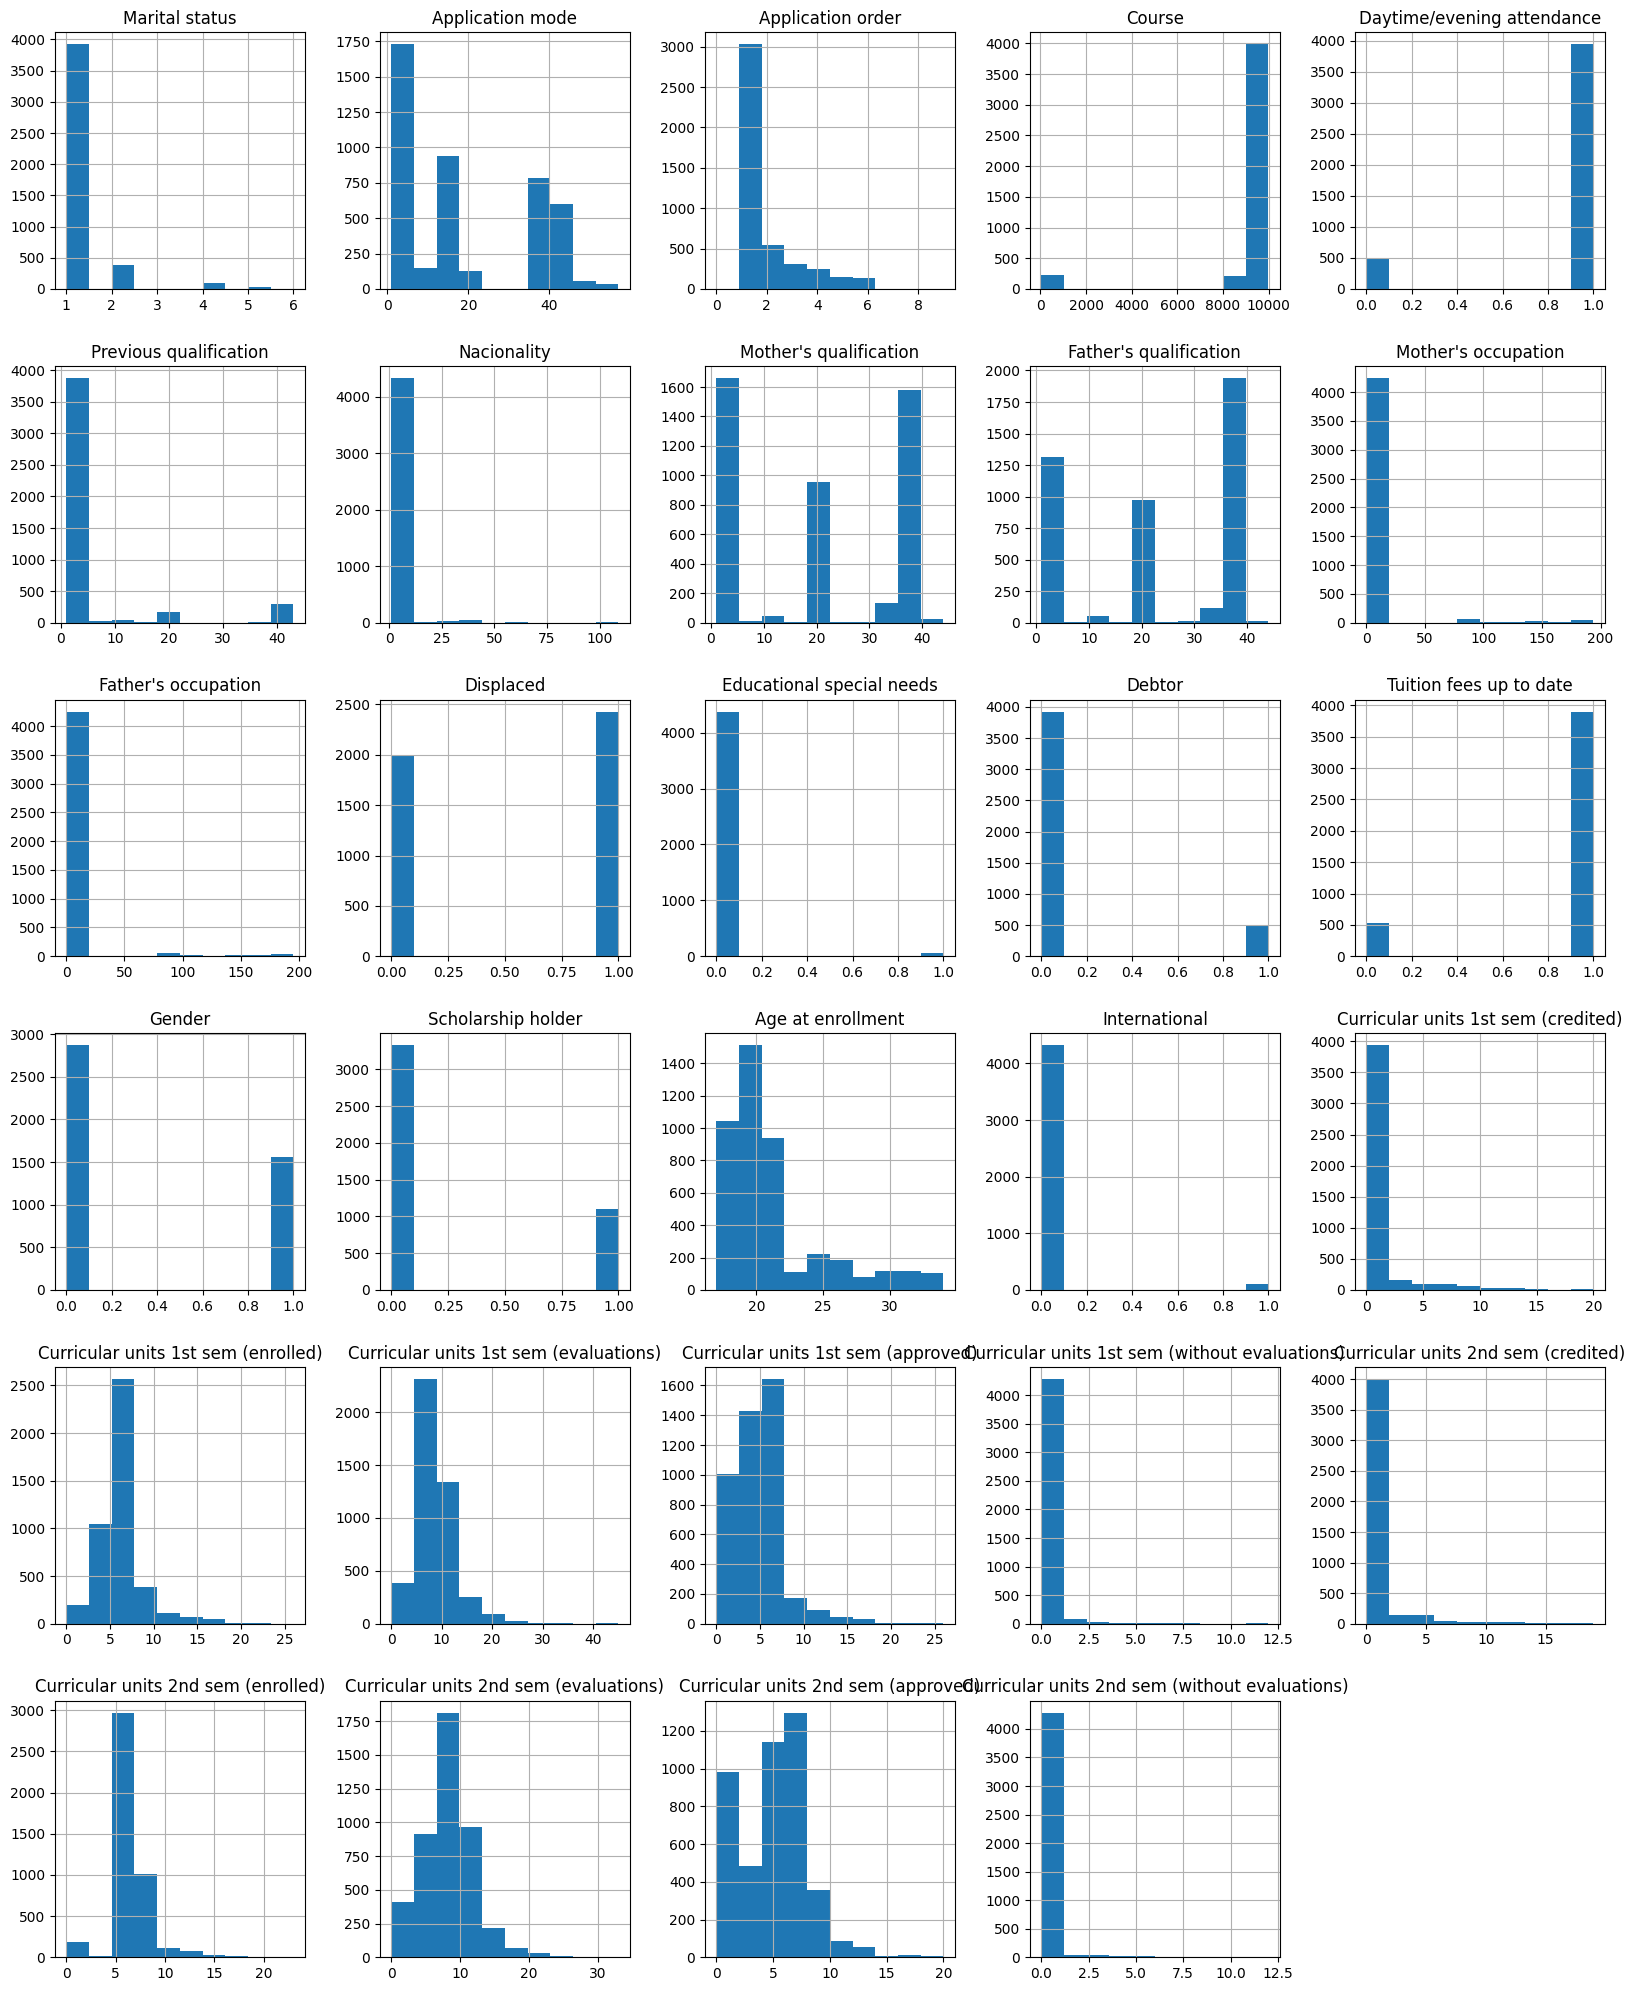

In [24]:
data.hist(figsize=(20, 25))

In [25]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [30]:
numeric_columns = ['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)']

for column in numeric_columns:

    column_data = data[column]
    len_data = len(column_data)
    # find outliers for that column (using Interquartile Range)
    float_data = []
    for item in column_data:
        float_data.append(float(item))

    Q1 = np.percentile(float_data, 25, method = 'midpoint')
    Q2 = np.percentile(float_data, 50, method = 'midpoint') 
    Q3 = np.percentile(float_data, 75, method = 'midpoint')
    IQR = Q3 - Q1
    
    low_lim =  Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
   
    outliers_indexes = []
    outliers_indexes = data[(data[column] > up_lim) | (data[column] < low_lim)].index

    #calculate column mean
    sum_column = 0
    count_column = 0
    for i in range(len(data)):
        if i not in outliers_indexes:
            sum_column += data.loc[i, column]
            count_column += 1

    mean_column =  int(sum_column / count_column)

    # replace mean 
    for i in outliers_indexes:
        data.loc[i, column] = mean_column

In [31]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,12,0,0,0,0,0,12,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,12,0,0,6,0,0,12,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100,1,37,38,9,9,141.5,0,0,0,1,0,0,21,0,0,6,9,5,12.333333,0,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.6,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120,105,1,1,9,9,119,1,0,1,0,0,0,18,1,0,6,6,6,12.0,0,0,6,6,2,11.0,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.9125,0,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.8,0,0,5,6,5,12.0,0,9.4,-0.8,-3.12,Graduate
